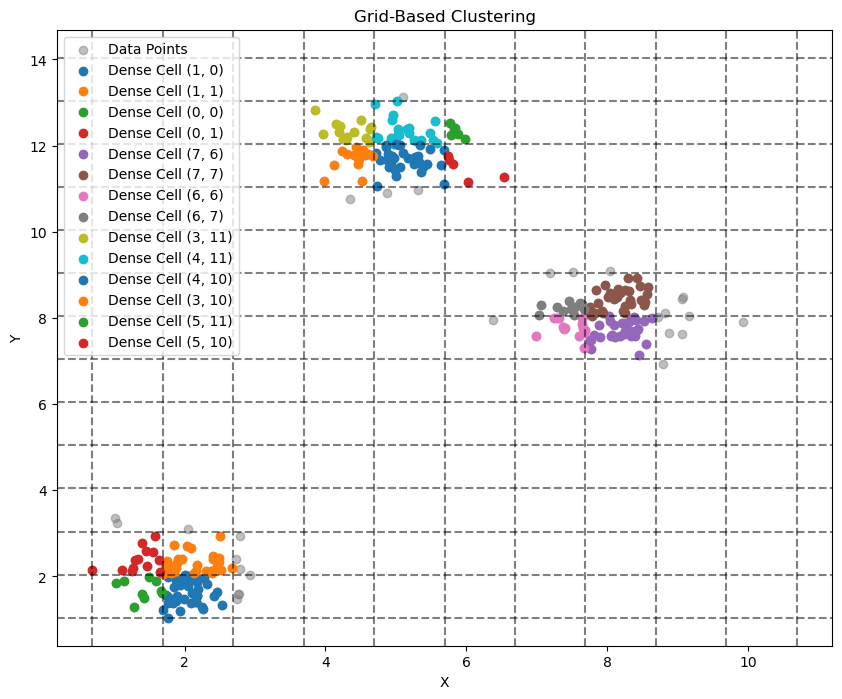

Number of Dense Cells: 14
Cell (1, 0) contains 37 points.
Cell (1, 1) contains 31 points.
Cell (0, 0) contains 9 points.
Cell (0, 1) contains 13 points.
Cell (7, 6) contains 31 points.
Cell (7, 7) contains 31 points.
Cell (6, 6) contains 14 points.
Cell (6, 7) contains 11 points.
Cell (3, 11) contains 14 points.
Cell (4, 11) contains 22 points.
Cell (4, 10) contains 32 points.
Cell (3, 10) contains 17 points.
Cell (5, 11) contains 6 points.
Cell (5, 10) contains 5 points.


In [1]:
#Grid-Based Clustering

import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
x1 = np.random.normal(2, 0.5, 100)
y1 = np.random.normal(2, 0.5, 100)

x2 = np.random.normal(8, 0.5, 100)
y2 = np.random.normal(8, 0.5, 100)

x3 = np.random.normal(5, 0.5, 100)
y3 = np.random.normal(12, 0.5, 100)


x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])

data = np.vstack((x, y)).T 


grid_size = 1.0  
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)


x_bins = np.arange(x_min, x_max + grid_size, grid_size)
y_bins = np.arange(y_min, y_max + grid_size, grid_size)


grid = {}
for point in data:
    x_idx = int((point[0] - x_min) // grid_size)
    y_idx = int((point[1] - y_min) // grid_size)
    cell = (x_idx, y_idx)
    if cell not in grid:
        grid[cell] = []
    grid[cell].append(point)


threshold = 5  
dense_cells = {cell: points for cell, points in grid.items() if len(points) >= threshold}


plt.figure(figsize=(10, 8))


plt.scatter(x, y, c='gray', alpha=0.5, label='Data Points')


for cell, points in dense_cells.items():
    points = np.array(points)
    plt.scatter(points[:, 0], points[:, 1], label=f'Dense Cell {cell}')


for xc in x_bins:
    plt.axvline(x=xc, color='k', linestyle='--', alpha=0.5)
for yc in y_bins:
    plt.axhline(y=yc, color='k', linestyle='--', alpha=0.5)

plt.title("Grid-Based Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


print("Number of Dense Cells:", len(dense_cells))
for cell, points in dense_cells.items():
    print(f"Cell {cell} contains {len(points)} points.")
